### Init

In [17]:
!pip install yellowbrick

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math

In [19]:
iris = load_iris()
x, y = iris.data, iris.target

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Clusterização K-Médias

N Clusters: 2 Avg: 0.6757500985509393
N Clusters: 3 Avg: 0.5572550286954637
N Clusters: 4 Avg: 0.4965676156117855
N Clusters: 5 Avg: 0.5018354525389606


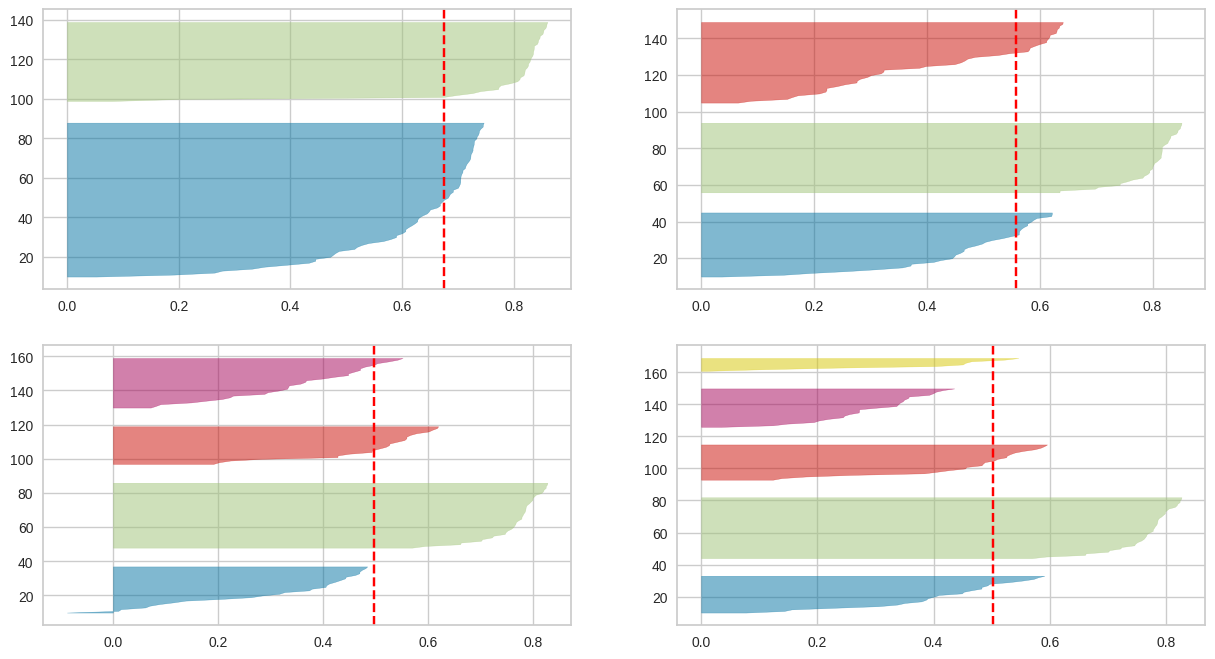

In [21]:
utils.visualize_silhouette(x_train, 5)

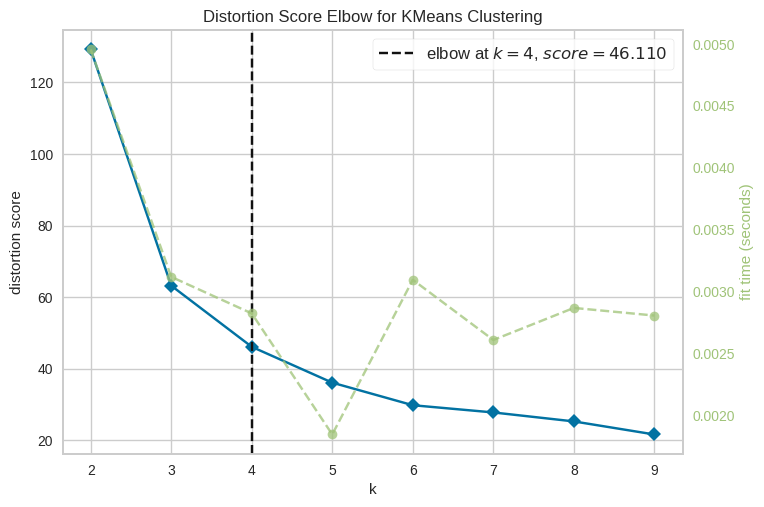

In [22]:
utils.visualize_elbow(x_train)

### Criação de Features

In [54]:
def generate_new_features(x, n):
    number_rows = len(x)
    x_mod = pd.DataFrame(x.copy())
    km = KMeans(n_clusters=n, random_state=0)
    km.fit(x_mod)
    centroids = km.cluster_centers_

    for index_c in range(len(centroids)):
        centroid = centroids[index_c]
        number_columns = len(x_mod.columns)
        column_name = f'F{index_c}'
        x_mod.insert(number_columns, column_name, [0]*number_rows, True)

        for index, row in x_mod.iterrows():
            distance = 0
            for index_r in range(len(pd.DataFrame(x).columns)):
                distance += (row[index_r] - centroid[index_r]) ** 2
            x_mod[index_][column_name] = math.sqrt(distance)

    return x_mod

In [55]:
x_train_mod = generate_new_features(x_train, 3)

In [56]:
x_train_mod

,0,1,2,3,F0,F1,F2
0,6.4,3.1,5.5,1.8,0,0,0
1,5.4,3.0,4.5,1.5,0,0,0
2,5.2,3.5,1.5,0.2,0,0,0
3,6.1,3.0,4.9,1.8,0,0,0
4,6.4,2.8,5.6,2.2,0,0,0
...,...,...,...,...,...,...,...
115,4.9,3.1,1.5,0.1,0,0,0
116,6.3,2.9,5.6,1.8,0,0,0
117,5.8,2.7,4.1,1.0,0,0,0
118,7.7,3.8,6.7,2.2,0,0,0


### Modelo de ML

### Avaliação de Modelos

### Análise Comparativa